In [7]:
install.packages("gt")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
install.packages("readr")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
install.packages("kableExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
library(haven)
library(stargazer)
library(dplyr)
library(infer)
library(ggplot2)
library(broom)
library(knitr)
library(kableExtra)
library(readr)
library(gtsummary)
library(gt)


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [9]:
library(gt)
library(gtsummary)

In [101]:
data <- read_dta("/Users/krishaantpathmanathan/Downloads/ECON 398/cen_ind_2021_pumf_v2.dta 3")


In [102]:
#removes NA rows
data <- data[data$CFInc != 88, ]

data <- data[data$agegrp != 88, ]

data <- data[data$genstat != 88, ]

data <- data[data$hdgree != 88, ]
data <- data[data$hdgree != 99, ]

data <- data[data$lfact != 88, ]
data <- data[data$lfact != 99, ]

data <- data[data$NOC21 != 88, ]
data <- data[data$NOC21 != 99, ]

data <- na.omit(data)


In [103]:
data <- data %>%
  mutate(first_gen = ifelse(genstat == 1, 1, 0))

data <- data %>%
  mutate(sec_gen = ifelse(genstat %in% c("2", "3"), 1, 0))
 
data <- data %>%
  mutate(third_gen = ifelse(genstat >= 4, 1, 0))


In [104]:
colnames(data)


[1] "ppsort"           "aboid"            "agegrp"          
  [4] "ageimm"           "attsch"           "bfnmemb"         
  [7] "bedrm"            "CFInc"            "CFInc_AT"        
 [10] "cfstat"           "chdbn"            "CIP2021"         
 [13] "CIP2021_STEM_SUM" "cma"              "condo"           
 [16] "COVID_ERB"        "cow"              "cqppb"           
 [19] "CapGn"            "CfSize"           "ChldC"           
 [22] "CitOth"           "Citizen"          "dist"            
 [25] "dpgrsum"          "dtype"            "EFDecile"        
 [28] "EFInc"            "EFInc_AT"         "eicbn"           
 [31] "ethder"           "EfDIMBM_2018"     "EfSize"          
 [34] "EmpIn"            "fol"              "fptwk"           
 [37] "Gender"           "genstat"          "GovtI"           
 [40] "GTRfs"            "HCORENEED_IND"    "hdgree"          
 [43] "HHInc"            "HHInc_AT"         "hhmrkinc"        
 [46] "hhsize"           "hhtype"           "hlmosten"        
 [49] "hlmostfr"         "hlmostno"         "hlregen"         
 [52] "hlregfr"          "hlregno"          "IMMCAT5"         
 [55] "immstat"          "IncTax"           "Invst"           
 [58] "jobperm"          "kol"              "lfact"           
 [61] "LICO_BT"          "LICO_AT"          "liprogtype"      
 [64] "LI_ELIG_OML_U18"  "locstud"          "LOC_ST_RES"      
 [67] "lstwrk"           "lwmosten"         "lwmostfr"        
 [70] "lwmostno"         "lwregen"          "lwregfr"         
 [73] "lwregno"          "LoLIMA"           "LoLIMB"          
 [76] "LOMBM_2018"       "mode"             "MTNEn"           
 [79] "MTNFr"            "mtnno"            "marsth"          
 [82] "Mob1"             "Mob5"             "MrkInc"          
 [85] "naics"            "NOC21"            "nol"             
 [88] "nos"              "oasgi"            "OtInc"           
 [91] "PKID25"           "PKID0_1"          "PKID15_24"       
 [94] "PKID2_5"          "PKID6_14"         "pkids"           
 [97] "pob"              "POBPAR1"          "POBPAR2"         
[100] "powst"            "pr"               "PR1"             
[103] "PR5"              "presmortg"        "prihm"           
[106] "pwdur"            "pwleave"          "pwocc"           
[109] "pwpr"             "regind"           "relig"           
[112] "repair"           "room"             "Retir"           
[115] "shelco"           "ssgrad"           "subsidy"         
[118] "SempI"            "tenur"            "TotInc"          
[121] "TotInc_AT"        "vismin"           "Value"           
[124] "wkswrk"           "wrkact"           "Wages"           
[127] "yrim"             "weight"           "WT1"             
[130] "WT2"              "WT3"              "WT4"             
[133] "WT5"              "WT6"              "WT7"             
[136] "WT8"              "WT9"              "WT10"            
[139] "WT11"             "WT12"             "WT13"            
[142] "WT14"             "WT15"             "WT16"            
[145] "first_gen"        "sec_gen"          "third_gen"

In [105]:
#making dummy for indivuals age 12-20
data <- data %>%
  mutate(agegrp_dummy = ifelse(agegrp %in% c("5", "6", "7"), 1, 0))

#dummy for bachelors degree to simplify 
data <- data %>%
  mutate(bachelors_degree = ifelse(hdgree %in% c(9), 1, 0))

In [106]:
summary(data[, c("CFInc", "bachelors_degree", "genstat", "first_gen", 
                 "sec_gen", "third_gen", "Gender", "agegrp", "hdgree", 
                 "NOC21", "pr", "lfact")])


     CFInc       bachelors_degree    genstat        first_gen     
 Min.   : 1.00   Min.   :0.0000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:0.0000  
 Median :25.00   Median :0.0000   Median :4.000   Median :0.0000  
 Mean   :23.42   Mean   :0.2088   Mean   :3.021   Mean   :0.2706  
 3rd Qu.:30.00   3rd Qu.:0.0000   3rd Qu.:4.000   3rd Qu.:1.0000  
 Max.   :33.00   Max.   :1.0000   Max.   :8.000   Max.   :1.0000  
    sec_gen         third_gen          Gender          agegrp       hdgree     
 Min.   :0.0000   Min.   :0.0000   Min.   :1.000   Min.   : 6   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:10   1st Qu.: 2.00  
 Median :0.0000   Median :1.0000   Median :2.000   Median :12   Median : 6.00  
 Mean   :0.1546   Mean   :0.5748   Mean   :1.519   Mean   :12   Mean   : 5.59  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:14   3rd Qu.: 9.00  
 Max.   :1.0000   Max.   :1.0000   Max.   :2.000   

In [107]:
library(haven)

In [108]:

data_clean <- data %>%
  mutate(across(c(CFInc, hdgree, genstat, agegrp, Gender, NOC21, lfact), haven::as_factor))


In [53]:
install.packages("xfun")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [60]:
install.packages("skimr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [76]:
library(haven) # USED CHAT GPT FOR THIS 
library(dplyr)
library(gtsummary)

# Read and clean data
data <- read_dta("/Users/krishaantpathmanathan/Downloads/ECON 398/cen_ind_2021_pumf_v2.dta 3")

# Remove NA rows
data <- data[data$CFInc != 88, ]
data <- data[data$agegrp != 88, ]
data <- data[data$genstat != 88, ]
data <- data[data$hdgree != 88, ]
data <- data[data$hdgree != 99, ]
data <- data[data$lfact != 88, ]
data <- data[data$lfact != 99, ]
data <- data[data$NOC21 != 88, ]
data <- data[data$NOC21 != 99, ]
data <- na.omit(data)

# Create dummy variables
data <- data %>%
  mutate(first_gen = ifelse(genstat == 1, 1, 0),
         sec_gen = ifelse(genstat %in% c(2, 3), 1, 0),
         third_gen = ifelse(genstat >= 4, 1, 0),
         bachelors_degree = ifelse(hdgree == 9, 1, 0))

# Convert to factors
data_clean <- data %>%
  mutate(across(c(CFInc, hdgree, genstat, agegrp, Gender, NOC21, lfact), haven::as_factor))

# Check the unique values of genstat to ensure we understand the data
cat("Unique values of genstat:\n")
print(unique(data$genstat))
cat("\nFrequency of genstat values:\n")
print(table(data$genstat))

# Basic summary for all data
cat("\n=== Basic Summary Table ===\n")
all_data_summary <- summary(data[c("CFInc", "genstat", "hdgree", "Gender", "agegrp")])
print(all_data_summary)

# Create simple frequency tables
cat("\n=== Frequency Tables ===\n")
cat("\nGeneration Status:\n")
print(table(data$genstat))

cat("\nIncome Levels:\n")
print(table(data$CFInc))

cat("\nEducation Levels:\n")
print(table(data$hdgree))

# Generate means by generation
cat("\n=== Mean Income by Generation ===\n")
income_by_gen <- tapply(data$CFInc, data$genstat, mean, na.rm = TRUE)
print(income_by_gen)

# Proportion with bachelor's degree by generation
cat("\n=== Proportion with Bachelor's Degree by Generation ===\n")
edu_by_gen <- tapply(data$bachelors_degree, data$genstat, mean, na.rm = TRUE) * 100
print(edu_by_gen)

# Create simple summary using gtsummary with error handling
tryCatch({
  simple_summary <- data_clean %>%
    select(CFInc, genstat, hdgree, Gender, agegrp) %>%
    tbl_summary()
  cat("\n=== gtsummary Table (as data frame) ===\n")
  print(as.data.frame(simple_summary))
}, error = function(e) {
  cat("\nError creating gtsummary table:", e$message, "\n")
})

# Create a simple data frame with key statistics
summary_df <- data.frame(
  Variable = c("Sample Size", "Mean Income", "% Female", "% Bachelor's Degree", "% First Gen", "% Second Gen", "% Third+ Gen"),
  Value = c(
    nrow(data),
    round(mean(data$CFInc, na.rm = TRUE), 2),
    round(mean(data$Gender == 2, na.rm = TRUE) * 100, 1),
    round(mean(data$bachelors_degree, na.rm = TRUE) * 100, 1),
    round(mean(data$first_gen, na.rm = TRUE) * 100, 1),
    round(mean(data$sec_gen, na.rm = TRUE) * 100, 1),
    round(mean(data$third_gen, na.rm = TRUE) * 100, 1)
  )
)

# Display the summary data frame
cat("\n=== Summary Statistics Data Frame ===\n")
print(summary_df)

# Save as CSV
write.csv(summary_df, "summary_statistics.csv", row.names = FALSE)

# Create cross-tabulations
cat("\n=== Cross-tabulation: Generation by Education ===\n")
gen_edu_table <- table(data$genstat, data$hdgree)
print(gen_edu_table)

cat("\n=== Cross-tabulation: Generation by Gender ===\n")
gen_gender_table <- table(data$genstat, data$Gender)
print(gen_gender_table)

# Save everything to a text file
sink("full_summary_output.txt")
cat("=== Data Summary Statistics ===\n\n")
cat("Sample size: ", nrow(data), "\n\n")

cat("Unique values of genstat:\n")
print(unique(data$genstat))

cat("\n\nFrequency of genstat values:\n")
print(table(data$genstat))

cat("\n\nMean Income by Generation:\n")
print(income_by_gen)

cat("\n\nProportion with Bachelor's Degree by Generation:\n")
print(edu_by_gen)

cat("\n\nSummary Data Frame:\n")
print(summary_df)

cat("\n\nCross-tabulation: Generation by Education:\n")
print(gen_edu_table)

cat("\n\nCross-tabulation: Generation by Gender:\n")
print(gen_gender_table)
sink()

cat("\nFiles saved: summary_statistics.csv and full_summary_output.txt\n")


Unique values of genstat:
<labelled<double>[5]>: Generation status: Detailed
[1] 1 3 4 2 8

Labels:
 value
     1
     2
     3
     4
     8
                                                                                                      label
                                                           First generation, respondent born outside Canada
                             Second generation, respondent born in Canada, both parents born outside Canada
 Second generation, respondent born in Canada, one parent born outside Canada and one parent born in Canada
                           Third generation or more, respondent born in Canada, both parents born in Canada
                                                                                              Not available

Frequency of genstat values:

     1      2      3      4      8 
145390  46765  36304 298837  10018 

=== Basic Summary Table ===
     CFInc          genstat          hdgree          Gender          agegrp  


In [78]:
library(ggplot2) # USED CHAT GPT FOR THIS 
library(dplyr)
library(patchwork)
library(forcats)
library(haven)

# Read and clean data
data <- read_dta("/Users/krishaantpathmanathan/Downloads/ECON 398/cen_ind_2021_pumf_v2.dta 3")

# Remove NA rows
data <- data[data$CFInc != 88, ]
data <- data[data$agegrp != 88, ]
data <- data[data$genstat != 88, ]
data <- data[data$hdgree != 88, ]
data <- data[data$hdgree != 99, ]
data <- data[data$lfact != 88, ]
data <- data[data$lfact != 99, ]
data <- data[data$NOC21 != 88, ]
data <- data[data$NOC21 != 99, ]
data <- na.omit(data)

# Create dummy variables
data <- data %>%
  mutate(
    first_gen = ifelse(genstat == 1, 1, 0),
    sec_gen = ifelse(genstat %in% c(2, 3), 1, 0),
    third_gen = ifelse(genstat >= 4, 1, 0),
    bachelors_degree = ifelse(hdgree == 9, 1, 0)
  )

# Prepare the visualization dataset
df <- data %>%
  mutate(
    genstat_label = case_when(
      genstat == 1 ~ "First",
      genstat %in% c(2, 3) ~ "Second",
      genstat >= 4 ~ "Third+",
      TRUE ~ NA_character_
    ),
    genstat_label = factor(genstat_label, levels = c("First", "Second", "Third+")),
    
    age_group_label = case_when(
      agegrp == 6 ~ "18-24",
      agegrp == 7 ~ "25-29",
      agegrp == 8 ~ "30-34",
      agegrp == 9 ~ "35-39",
      agegrp == 10 ~ "40-44",
      agegrp == 11 ~ "45-49",
      agegrp == 12 ~ "50-54",
      agegrp == 13 ~ "55-59",
      agegrp == 14 ~ "60-64",
      agegrp >= 15 ~ "65+",
      TRUE ~ as.character(agegrp)
    ),
    age_group_label = factor(age_group_label, levels = c("18-24", "25-29", "30-34", "35-39", 
                                                         "40-44", "45-49", "50-54", "55-59", 
                                                         "60-64", "65+")),
    
    region_label = case_when(
      pr == 10 ~ "NL",
      pr == 11 ~ "PE",
      pr == 12 ~ "NS",
      pr == 13 ~ "NB",
      pr == 24 ~ "QC",
      pr == 35 ~ "ON",
      pr == 46 ~ "MB",
      pr == 47 ~ "SK",
      pr == 48 ~ "AB",
      pr == 59 ~ "BC",
      pr == 60 ~ "YT",
      pr == 61 ~ "NT",
      pr == 62 ~ "NU",
      TRUE ~ as.character(pr)
    ),
    
    gender_label = factor(Gender, labels = c("Male", "Female")),
    
    education_label = factor(hdgree, labels = c(
      "No certificate",
      "High school",
      "Trades certificate",
      "College diploma",
      "University below bachelor",
      "Bachelor's degree",
      "Graduate degree"
    )[1:length(unique(hdgree))])
  )

# Set a clean theme for all plots
theme_set(theme_minimal() + 
          theme(plot.title = element_text(face = "bold", size = 12),
                axis.text.x = element_text(angle = 45, hjust = 1)))

# Plot 1: Income by Generation with mean overlay
p1 <- ggplot(df, aes(x = genstat_label, y = CFInc)) +
  geom_boxplot(fill = "lightblue", alpha = 0.7, outlier.alpha = 0.1) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "red") +
  labs(title = "Income Distribution by Generation",
       x = "Generation",
       y = "Income Level",
       caption = "Red diamonds indicate mean values") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot 2: Education Distribution by Generation
p2 <- df %>%
  count(genstat_label, education_label) %>%
  group_by(genstat_label) %>%
  mutate(pct = n / sum(n)) %>%
  ggplot(aes(x = education_label, y = pct, fill = genstat_label)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Education Levels by Generation",
       x = "Education Level",
       y = "Percentage",
       fill = "Generation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 3: Income by Age Group and Generation
p3 <- ggplot(df, aes(x = age_group_label, y = CFInc, fill = genstat_label)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.1) +
  labs(title = "Income by Age Group and Generation",
       x = "Age Group",
       y = "Income Level",
       fill = "Generation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 4: Average Income by Region (with error bars)
p4 <- df %>%
  group_by(region_label) %>%
  summarise(
    mean_income = mean(CFInc, na.rm = TRUE),
    se_income = sd(CFInc, na.rm = TRUE) / sqrt(n()),
    n = n()
  ) %>%
  ggplot(aes(x = fct_reorder(region_label, mean_income), y = mean_income)) +
  geom_col(fill = "steelblue") +
  geom_errorbar(aes(ymin = mean_income - 1.96*se_income, 
                    ymax = mean_income + 1.96*se_income), 
                width = 0.2) +
  labs(title = "Average Income by Province",
       subtitle = "Error bars show 95% confidence intervals",
       x = "Province",
       y = "Average Income Level") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 5: Income by Gender and Generation
p5 <- ggplot(df, aes(x = gender_label, y = CFInc, fill = genstat_label)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.1) +
  labs(title = "Income by Gender and Generation",
       x = "Gender",
       y = "Income Level",
       fill = "Generation") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot 6: Bachelor's Degree Attainment by Generation
p6 <- df %>%
  group_by(genstat_label) %>%
  summarise(
    pct_bachelors = mean(bachelors_degree) * 100,
    n = n()
  ) %>%
  ggplot(aes(x = genstat_label, y = pct_bachelors, fill = genstat_label)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = sprintf("%.1f%%", pct_bachelors)), 
            vjust = -0.5, size = 3) +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  labs(title = "Bachelor's Degree Attainment by Generation",
       x = "Generation",
       y = "Percentage") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot 7: Income by Education Level and Generation
p7 <- ggplot(df, aes(x = education_label, y = CFInc, fill = genstat_label)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.1) +
  labs(title = "Income by Education Level and Generation",
       x = "Education Level",
       y = "Income Level",
       fill = "Generation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 8: Sample Sizes by Generation
p8 <- df %>%
  count(genstat_label) %>%
  ggplot(aes(x = genstat_label, y = n, fill = genstat_label)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = scales::comma(n)), vjust = -0.5, size = 3) +
  labs(title = "Sample Size by Generation",
       x = "Generation",
       y = "Number of Respondents") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Create 2x4 layout using patchwork
layout_1 <- (p1 | p2) / (p3 | p4) / (p5 | p6) / (p7 | p8)

# Save the combined plot
ggsave("regression_visualizations.png", layout_1, width = 16, height = 18, dpi = 300)

# Create additional diagnostic plots for regression analysis

# Plot 9: Mean Income with Confidence Intervals by Generation
p9 <- df %>%
  group_by(genstat_label) %>%
  summarise(
    mean_income = mean(CFInc, na.rm = TRUE),
    se_income = sd(CFInc, na.rm = TRUE) / sqrt(n()),
    n = n()
  ) %>%
  ggplot(aes(x = genstat_label, y = mean_income)) +
  geom_point(size = 4) +
  geom_errorbar(aes(ymin = mean_income - 1.96*se_income, 
                    ymax = mean_income + 1.96*se_income), 
                width = 0.2) +
  labs(title = "Mean Income by Generation with 95% CI",
       x = "Generation",
       y = "Mean Income Level") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot 10: Predicted vs Actual Values from Regression
# First run a simple regression
mod <- lm(CFInc ~ genstat + Gender + agegrp + hdgree, data = df)
df$predicted <- predict(mod)

p10 <- ggplot(df, aes(x = predicted, y = CFInc)) +
  geom_point(alpha = 0.1, color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Regression: Predicted vs Actual Income",
       x = "Predicted Income",
       y = "Actual Income")

# Create additional focused visualizations
layout_2 <- (p9 | p10)
ggsave("regression_diagnostics.png", layout_2, width = 12, height = 6, dpi = 300)

# Save individual plots for flexibility
plots <- list(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10)
names(plots) <- c("income_by_generation", "education_by_generation", 
                  "income_by_age_gen", "income_by_province", 
                  "income_by_gender_gen", "bachelors_by_generation",
                  "income_by_education_gen", "sample_sizes",
                  "mean_income_ci", "predicted_vs_actual")

for(i in seq_along(plots)) {
  ggsave(paste0("plot_", names(plots)[i], ".png"), 
         plots[[i]], width = 8, height = 6, dpi = 300)
}

# Create summary table for key findings
summary_findings <- df %>%
  group_by(genstat_label) %>%
  summarise(
    n = n(),
    mean_income = mean(CFInc, na.rm = TRUE),
    median_income = median(CFInc, na.rm = TRUE),
    sd_income = sd(CFInc, na.rm = TRUE),
    pct_bachelors = mean(bachelors_degree) * 100,
    mean_age_group = mean(agegrp, na.rm = TRUE),
    pct_female = mean(Gender == 2) * 100
  )

write.csv(summary_findings, "generation_summary_findings.csv", row.names = FALSE)
print(summary_findings)

# A tibble: 3 × 8
  genstat_label      n mean_income median_income sd_income pct_bachelors
  <fct>          <int>       <dbl>         <dbl>     <dbl>         <dbl>
1 First         145390        22.2            24      8.13          27.5
2 Second         83069        24.8            27      7.35          24.4
3 Third+        308855        23.6            25      7.49          16.8
# ℹ 2 more variables: mean_age_group <dbl>, pct_female <dbl>


In [80]:
# simple regression 1 - CFInc (Income) based on Gentstat (First Gen / Second Gen Canadian)


reg_1 <-  lm(CFInc ~ genstat, data = data)

stargazer(reg_1, type = "text")



                        Dependent variable:    
                    ---------------------------
                               CFInc           
-----------------------------------------------
genstat                      0.212***          
                              (0.007)          
                                               
Constant                     22.783***         
                              (0.024)          
                                               
-----------------------------------------------
Observations                  537,314          
R2                             0.002           
Adjusted R2                    0.002           
Residual Std. Error     7.684 (df = 537312)    
F Statistic         896.123*** (df = 1; 537312)
Note:               *p<0.1; **p<0.05; ***p<0.01


In [81]:
# simple regression 2 - adding covariates for Gender and agegrp 

reg_2 <-  lm(CFInc ~ genstat + Gender + agegrp, data = data)

stargazer(reg_2, type = "text")



                        Dependent variable:    
                    ---------------------------
                               CFInc           
-----------------------------------------------
genstat                      0.215***          
                              (0.007)          
                                               
Gender                       0.055***          
                              (0.021)          
                                               
agegrp                       0.090***          
                              (0.003)          
                                               
Constant                     21.607***         
                              (0.058)          
                                               
-----------------------------------------------
Observations                  537,314          
R2                             0.003           
Adjusted R2                    0.003           
Residual Std. Error     7.680 (df = 537

In [82]:
# simple regression 3 - adding covariates for hdgree (education level) and lfact (labour force participation)

reg_3 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact, data = data)

stargazer(reg_3, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.365***           
                               (0.007)           
                                                 
Gender                        0.301***           
                               (0.021)           
                                                 
agegrp                        0.065***           
                               (0.003)           
                                                 
hdgree                        0.365***           
                               (0.003)           
                                                 
lfact                         -0.222***          
                               (0.003)           
                                                 
Constant                      19.559***          

In [83]:
# simple regression 4 - by pr (province)

reg_4 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact + pr, data = data)

stargazer(reg_4, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.386***           
                               (0.007)           
                                                 
Gender                        0.302***           
                               (0.021)           
                                                 
agegrp                        0.065***           
                               (0.003)           
                                                 
hdgree                        0.366***           
                               (0.003)           
                                                 
lfact                         -0.221***          
                               (0.003)           
                                                 
pr                            0.018***           

In [84]:
reg_5 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact + pr, data = data)

stargazer(reg_4, type = "text")


                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.386***           
                               (0.007)           
                                                 
Gender                        0.302***           
                               (0.021)           
                                                 
agegrp                        0.065***           
                               (0.003)           
                                                 
hdgree                        0.366***           
                               (0.003)           
                                                 
lfact                         -0.221***          
                               (0.003)           
                                                 
pr                            0.018***           

In [85]:
# checking for interaction effects 

reg_interaction <- lm(CFInc ~ genstat * hdgree + pr + Gender + agegrp + genstat * lfact, data = data)


stargazer(reg_interaction, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                         0.013            
                               (0.015)           
                                                 
hdgree                        0.210***           
                               (0.006)           
                                                 
pr                            0.018***           
                               (0.001)           
                                                 
Gender                        0.322***           
                               (0.021)           
                                                 
agegrp                        0.061***           
                               (0.003)           
                                                 
lfact                         -0.279***          

In [86]:
# more expierementing 

reg_interaction <- lm(CFInc ~ genstat * hdgree + pr + Gender + agegrp + genstat * lfact + hdgree * agegrp + hdgree * genstat, data = data)


stargazer(reg_interaction, type = "text")


                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                        -0.017            
                               (0.015)           
                                                 
hdgree                        -0.928***          
                               (0.013)           
                                                 
pr                            0.016***           
                               (0.001)           
                                                 
Gender                        0.238***           
                               (0.021)           
                                                 
agegrp                        -0.376***          
                               (0.006)           
                                                 
lfact                         -0.295***          

In [87]:
# more expierementing 

reg_interaction <- lm(CFInc ~ genstat * hdgree + pr + Gender + agegrp + hdgree * genstat, data = data)


stargazer(reg_interaction, type = "text")


                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.070***           
                               (0.014)           
                                                 
hdgree                        0.239***           
                               (0.006)           
                                                 
pr                            0.018***           
                               (0.001)           
                                                 
Gender                        0.376***           
                               (0.021)           
                                                 
agegrp                        0.062***           
                               (0.003)           
                                                 
genstat:hdgree                0.053***           

In [88]:
# Basic regressions
model1 <- lm(CFInc ~ genstat, data = data)
model2 <- lm(CFInc ~ genstat + Gender, data = data)
model3 <- lm(CFInc ~ genstat + Gender + agegrp, data = data)
model4 <- lm(CFInc ~ genstat + Gender + agegrp + hdgree, data = data)
model5 <- lm(CFInc ~ genstat * hdgree + pr + Gender + agegrp + genstat * lfact, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, model5,
          type = "html", 
          title = "Income on Generational Status",
          dep.var.labels = "Dependent Variable: CFInc",
          out = "income_table5.html")




<table style="text-align:center"><caption><strong>Income on Generational Status</strong></caption>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="5"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="5" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="5">Dependent Variable: CFInc</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td><td>(5)</td></tr>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">genstat</td><td>0.212<sup>***</sup></td><td>0.212<sup>***</sup></td><td>0.215<sup>***</sup></td><td>0.371<sup>***</sup></td><td>0.013</td></tr>
<tr><td style="text-align:left"></td><td>(0.007)</td><td>(0.007)</td><td>(0.007)</td><td>(0.007)</td><td>(0.015)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td><td></td></tr>
<tr><td styl

In [89]:
# Basic regressions 2
model1 <- lm(CFInc ~ genstat, data = data)
model2 <- lm(CFInc ~ genstat + Gender + agegrp, data = data)
model3 <- lm(CFInc ~ genstat + Gender + agegrp + hdgree, data = data)
model4 <- lm(CFInc ~ genstat + Gender + agegrp + hdgree + NOC21, data = data)
model5 <- lm(CFInc ~ genstat + Gender + agegrp + hdgree + NOC21 + pr + genstat * lfact, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4,model5,
          type = "html", 
          title = "Income on Generational Status",
          dep.var.labels = "Dependent Variable: CFInc",
          out = "income_table12.html")




<table style="text-align:center"><caption><strong>Income on Generational Status</strong></caption>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="5"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="5" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="5">Dependent Variable: CFInc</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td><td>(5)</td></tr>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">genstat</td><td>0.212<sup>***</sup></td><td>0.215<sup>***</sup></td><td>0.371<sup>***</sup></td><td>0.348<sup>***</sup></td><td>0.333<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.007)</td><td>(0.007)</td><td>(0.007)</td><td>(0.007)</td><td>(0.009)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td><td></td></tr

In [109]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1.1 <- lm(bachelors_degree ~ genstat, data = data)
model2.1 <- lm(bachelors_degree ~ genstat + Gender, data = data)
model3.1 <- lm(bachelors_degree ~ genstat + Gender + agegrp, data = data)
model4.1 <- lm(bachelors_degree ~ genstat + Gender + agegrp + lfact*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1.1, model2.1, model3.1, model4.1, 
          type = "html", 
          title = "Degree on Generational Status",
          dep.var.labels = "Dependent Variable: bachelors_degree",
          out = "degree_table4.html")




<table style="text-align:center"><caption><strong>Degree on Generational Status</strong></caption>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="4"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="4">Dependent Variable: bachelors</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">genstat</td><td>-0.028<sup>***</sup></td><td>-0.028<sup>***</sup></td><td>-0.029<sup>***</sup></td><td>-0.026<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.0004)</td><td>(0.0004)</td><td>(0.0004)</td><td>(0.0004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Gender</td><td></td

In [110]:
#very rough test if holding a bachelors degree is influenced by working ages 11-19
extra1=lm(bachelors_degree ~ lfact*agegrp_dummy, data = data)
summary(extra1)



Call:
lm(formula = bachelors_degree ~ lfact * agegrp_dummy, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22692 -0.22692 -0.22692 -0.00186  0.99827 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.2328939  0.0006958  334.72   <2e-16 ***
lfact              -0.0059729  0.0001848  -32.33   <2e-16 ***
agegrp_dummy       -0.2311728  0.0034096  -67.80   <2e-16 ***
lfact:agegrp_dummy  0.0059854  0.0005576   10.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4032 on 537310 degrees of freedom
Multiple R-squared:  0.01566,	Adjusted R-squared:  0.01565 
F-statistic:  2849 on 3 and 537310 DF,  p-value: < 2.2e-16


In [92]:
# sees income effect for first gen immegratns only 
# Basic regressions 2
model1 <- lm(CFInc ~ first_gen, data = data)
model2 <- lm(CFInc ~ first_gen + Gender + agegrp, data = data)
model3 <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree, data = data)
model4 <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree + NOC21, data = data)
model5 <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree + NOC21 + pr + genstat * lfact, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4,model5,
        type = "text", 
          title = "Income on first Generational Status",
          dep.var.labels = "Dependent Variable: CFInc")



Income on first Generational Status
                                                                                     Dependent variable:                                                                 
                    -----------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                  Dependent Variable: CFInc                                                              
                                 (1)                           (2)                           (3)                           (4)                           (5)             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
first_gen                     -1.662***                     -1.693***                     -2.302***              

In [111]:
# income for second gen immegrants only
model1 <- lm(CFInc ~ sec_gen, data = data)
model2 <- lm(CFInc ~ sec_gen + Gender + agegrp, data = data)
model3 <- lm(CFInc ~ sec_gen + Gender + agegrp + hdgree, data = data)
model4 <- lm(CFInc ~ sec_gen + Gender + agegrp + hdgree + NOC21, data = data)
model5 <- lm(CFInc ~ sec_gen + Gender + agegrp + hdgree + NOC21 + pr + genstat * lfact, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4,model5,
        type = "text", 
          title = "Income on Second Generational Status",
          dep.var.labels = "Dependent Variable: CFInc")


Income on Second Generational Status
                                                                                     Dependent variable:                                                                 
                    -----------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                  Dependent Variable: CFInc                                                              
                                 (1)                           (2)                           (3)                           (4)                           (5)             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sec_gen                       1.611***                      1.665***                      1.570***              

In [112]:
# income for third gen immegrants only
model1 <- lm(CFInc ~ third_gen, data = data)
model2 <- lm(CFInc ~ third_gen + Gender + agegrp, data = data)
model3 <- lm(CFInc ~ third_gen + Gender + agegrp + hdgree, data = data)
model4 <- lm(CFInc ~ third_gen + Gender + agegrp + hdgree + NOC21, data = data)
model5 <- lm(CFInc ~ third_gen + Gender + agegrp + hdgree + NOC21 + pr + genstat * lfact, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4,model5,
        type = "text", 
          title = "Income on Third+ Generational Status",
          dep.var.labels = "Dependent Variable: CFInc")


Income on Third+ Generational Status
                                                                                   Dependent variable:                                                               
                    -------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                Dependent Variable: CFInc                                                            
                                (1)                         (2)                          (3)                           (4)                           (5)             
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
third_gen                    0.481***                    0.477***                     0.991***                      0.946***        

In [113]:
mod_A <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree, data = data)
mod_B <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree, data = data)
mod_C <- lm(CFInc ~ first_gen + Gender + agegrp + hdgree, data = data)


In [114]:
#dummy for in labour force
data <- data %>%
  mutate(lfact_dummy = ifelse(lfact %in% c(11,12,13,14), 1, 0))



In [117]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1 <- lm(bachelors_degree ~ third_gen, data = data)
model2 <- lm(bachelors_degree ~ third_gen + Gender, data = data)
model3 <- lm(bachelors_degree ~ third_gen + Gender + agegrp, data = data)
model4 <- lm(bachelors_degree ~ third_gen + Gender + agegrp + employed_dummy*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "text", 
          title = "Degree on Third Generational Status",
          dep.var.labels = "Dependent Variable: bachelors_degree",
          out = "degree_table4.html")


ERROR: Error in eval(predvars, data, env): object 'employed_dummy' not found


In [118]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1 <- lm(bachelors_degree ~ first_gen, data = data)
model2 <- lm(bachelors_degree ~ first_gen + Gender, data = data)
model3 <- lm(bachelors_degree ~ first_gen + Gender + agegrp, data = data)
model4 <- lm(bachelors_degree ~ first_gen + Gender + agegrp + lfact*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "text", 
          title = "Degree on First Generational Status",
          dep.var.labels = "Dependent Variable: bachelors_degree",
          out = "degree_table4.html")



Degree on First Generational Status
                                                                      Dependent variable:                                                  
                    -----------------------------------------------------------------------------------------------------------------------
                                                                 Dependent Variable: bachelors                                             
                                 (1)                           (2)                           (3)                           (4)             
-------------------------------------------------------------------------------------------------------------------------------------------
first_gen                     0.091***                      0.091***                      0.093***                      0.084***           
                               (0.001)                       (0.001)                       (0.001)                       (0

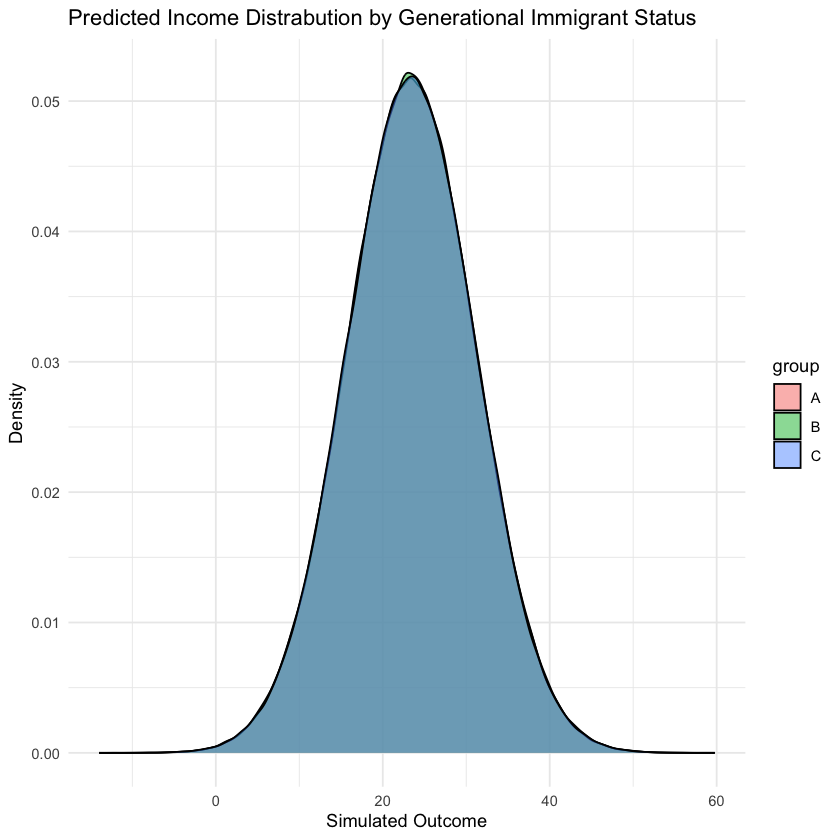

In [119]:
#Plots of income distrabution for first seocnd and third gen immegrants overlapping 
fitted_A <- predict(mod_A)
fitted_B <- predict(mod_B)
fitted_C <- predict(mod_C)

# Get residual SD
sigma_A <- summary(mod_A)$sigma
sigma_B <- summary(mod_B)$sigma
sigma_C <- summary(mod_C)$sigma

# Simulate predicted outcomes around the fitted values
set.seed(123)
sim_A <- rnorm(length(fitted_A), mean = fitted_A, sd = sigma_A)
sim_B <- rnorm(length(fitted_B), mean = fitted_B, sd = sigma_B)
sim_C <- rnorm(length(fitted_C), mean = fitted_C, sd = sigma_C)

# Combine for plotting
df_plot <- data.frame(
  outcome = c(sim_A, sim_B, sim_C),
  group = factor(c(
    rep("A", length(sim_A)),
    rep("B", length(sim_B)),
    rep("C", length(sim_C))
  ))
)

# Plot
ggplot(df_plot, aes(x = outcome, fill = group)) +
  geom_density(alpha = 0.5) +
  labs(title = "Predicted Income Distrabution by Generational Immigrant Status",
       x = "Simulated Outcome", y = "Density") +
  theme_minimal()


In [120]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1 <- lm(bachelors_degree ~ sec_gen, data = data)
model2 <- lm(bachelors_degree ~ sec_gen + Gender, data = data)
model3 <- lm(bachelors_degree ~ sec_gen + Gender + agegrp, data = data)
model4 <- lm(bachelors_degree ~ sec_gen + Gender + agegrp + lfact*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "text", 
          title = "Degree on First Second Generational Status",
          dep.var.labels = "Dependent Variable: bachelors_degree",
          out = "degree_table4.html")



Degree on First Second Generational Status
                                                                     Dependent variable:                                                 
                    ---------------------------------------------------------------------------------------------------------------------
                                                                Dependent Variable: bachelors                                            
                                (1)                          (2)                           (3)                           (4)             
-----------------------------------------------------------------------------------------------------------------------------------------
sec_gen                      0.042***                     0.042***                      0.040***                      0.042***           
                              (0.002)                      (0.002)                       (0.002)                       (0.002)  

In [121]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1 <- lm(bachelors_degree ~ genstat, data = data)
model2 <- lm(bachelors_degree ~ genstat + Gender, data = data)
model3 <- lm(bachelors_degree ~ genstat + Gender + agegrp, data = data)
model4 <- lm(bachelors_degree ~ genstat + Gender + agegrp + lfact_dummy*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "html", 
          title = "Bachelors Degree on Generational Status",
          dep.var.labels = "Dependent Variable: bachelors_degree",
          out = "degree_table4.html")



<table style="text-align:center"><caption><strong>Bachelors Degree on Generational Status</strong></caption>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="4"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="4">Dependent Variable: bachelors</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">genstat</td><td>-0.028<sup>***</sup></td><td>-0.028<sup>***</sup></td><td>-0.029<sup>***</sup></td><td>-0.026<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.0004)</td><td>(0.0004)</td><td>(0.0004)</td><td>(0.0004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Gender</t